           country  abs_1990  abs_2005   abs_2017 p2017_vs_world  \
42           China  2397.048  6263.064  10877.218         29.34%   
202  United States  5085.897  5971.571   5107.393         13.77%   
93           India   605.968  1210.754   2454.774          6.62%   
158         Russia  2378.921  1733.950   1764.866          4.76%   
102          Japan  1149.400  1276.863   1320.776          3.56%   

    lp2017_vs_1990  f2017_area  f2017_capita f2018_incl_LUFC f2018_excl_LUFC  
42          353.8%      1133.0           7.7         9663.36        10313.46  
202           0.4%       519.0          15.7         4749.57         4981.30  
93          305.1%       747.0           1.8         2400.25         2434.52  
158         -25.8%       103.0          12.3         1049.05         1607.55  
102          14.9%      3494.0          10.4         1074.08         1106.15  


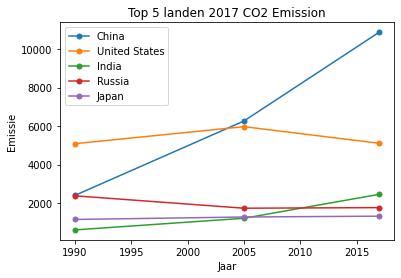

                       country  abs_1990  abs_2005  abs_2017 p2017_vs_world  \
20                     Belgium   115.903   118.708   104.221          0.28%   
184  Switzerland Liechtenstein    44.955    47.161    39.738          0.11%   
72               France Monaco   386.214   408.158   338.193          0.91%   
15                     Bahamas     1.524     2.068     2.997          0.01%   
30                      Brunei     3.397     5.174     6.711          0.02%   
207                    Vietnam    20.182    99.231   218.729          0.59%   

     lp1990  lp2005_vs_1990 lp2017_vs_1990  f2017_area  f2017_capita  \
20    100.0      102.420127         -10.1%      3414.0           9.1   
184   100.0      104.907129         -11.6%       959.0           4.7   
72    100.0      105.681824         -12.4%       528.0           5.2   
15    100.0      135.695538          96.7%       215.0           7.6   
30    100.0      152.310863          97.6%      1164.0          15.7   
207   100.0   

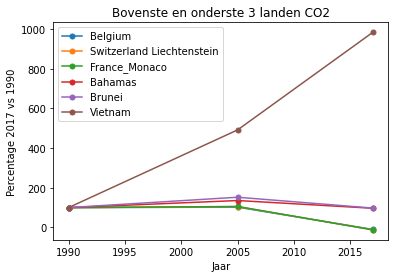

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
countries = tables[1]
countries.columns = ['country', 'abs_1990', 'abs_2005', 'abs_2017', 'p2017_vs_world', 'lp2017_vs_1990', 'f2017_area', 'f2017_capita', 'f2018_incl_LUFC', 'f2018_excl_LUFC']
#Europa en Wereld eruit halen
countries = countries.loc[(~countries.country.str.contains('World')) & (countries.country != 'European Union')]
countries_top5= countries.sort_values('abs_2017', ascending=False).head(5)
print(countries_top5)
fig, ax = plt.subplots()
x= countries_top5.rename(columns={'abs_1990': 1990, 'abs_2005': 2005, 'abs_2017': 2017}).columns[1:4]
China = countries_top5.iloc[0, countries_top5.columns.str.contains('abs')].to_numpy()
United_States = countries_top5.iloc[1, countries_top5.columns.str.contains('abs')].to_numpy()
India = countries_top5.iloc[2, countries_top5.columns.str.contains('abs')].to_numpy()
Russia = countries_top5.iloc[3, countries_top5.columns.str.contains('abs')].to_numpy()
Japan = countries_top5.iloc[4, countries_top5.columns.str.contains('abs')].to_numpy()
ax.plot(x, China, label='China', marker=".", markersize=10)
ax.plot(x, United_States, label='United States', marker=".", markersize=10)
ax.plot(x, India, label='India', marker=".", markersize=10)
ax.plot(x, Russia, label='Russia', marker=".", markersize=10)
ax.plot(x, Japan, label='Japan', marker=".", markersize=10)
plt.title('Top 5 landen 2017 CO2 Emission')
plt.xlabel("Jaar")
plt.ylabel("Emissie")
ax.legend();
plt.show()

countries.insert(5, 'lp1990', 100.0)
countries.insert(6, 'lp2005_vs_1990', countries.abs_2005/ countries.abs_1990 * 100)
countries_lowering_top3= countries.sort_values('lp2017_vs_1990').head(3)
countries_lowering_tb3= countries_lowering_top3.append(countries.sort_values('lp2017_vs_1990').tail(3))
print(countries_lowering_tb3)
#Converteren string naar float
countries_lowering_tb3.lp2017_vs_1990= countries_lowering_tb3.lp2017_vs_1990.str.strip('%')
countries_lowering_tb3.lp2017_vs_1990= countries_lowering_tb3.lp2017_vs_1990.astype(float)
fig, ax = plt.subplots()
Belgium = countries_lowering_tb3.iloc[0, countries_lowering_tb3.columns.str.contains('lp')].to_numpy()
Switzerland_Liechtenstein = countries_lowering_tb3.iloc[1, countries_lowering_tb3.columns.str.contains('lp')].to_numpy()
France_Monaco = countries_lowering_tb3.iloc[2, countries_lowering_tb3.columns.str.contains('lp')].to_numpy()
Bahamas = countries_lowering_tb3.iloc[3, countries_lowering_tb3.columns.str.contains('lp')].to_numpy()
Brunei = countries_lowering_tb3.iloc[4, countries_lowering_tb3.columns.str.contains('lp')].to_numpy()
Vietnam = countries_lowering_tb3.iloc[5, countries_lowering_tb3.columns.str.contains('lp')].to_numpy()
ax.plot(x, Belgium, label='Belgium', marker=".", markersize=10)
ax.plot(x, Switzerland_Liechtenstein, label='Switzerland Liechtenstein', marker=".", markersize=10)
ax.plot(x, France_Monaco, label='France_Monaco', marker=".", markersize=10)
ax.plot(x, Bahamas, label='Bahamas', marker=".", markersize=10)
ax.plot(x, Brunei, label='Brunei', marker=".", markersize=10)
ax.plot(x, Vietnam, label='Vietnam', marker=".", markersize=10)
plt.title('Bovenste en onderste 3 landen CO2')
plt.xlabel("Jaar")
plt.ylabel("Percentage 2017 vs 1990")
ax.legend(); 
plt.show()

